# Analysis on factors influencing Life Expectancy 


# Introduction
Life expectancy tells us the average life span a person who has attained a given age can expect to live and often used to gauge the overall health of a community. Knowing what factors contribute to long life span will be helpful in targeting resources toward improving human mortality rates and also it will be easier for a country to decide the predicting factors contributing to shorter life span. 

The purpose of this research(analysis) is to help health organizations and governments learn the longer life span factors. 

##Dataset
This dataset contains the health factors such as immunization factors, mortality factors, etc. from year 2000 to 2015 for 193 countries and has been collected from WHO data repository website and its corresponding economic data was collected from United Nation website. 

The dataset can be found [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

**Dataset in detail**

This dataset consists of 22 Columns and 2938 rows.
- Country: 193 countries
- Year: From 2000 - 2015
- Status: Developed or Developing
- Life Expectancy: Life expectancy in age
- Adult Mortality: Adult mortality rates of both sexes (Probability of dying between 15 and 60 year per 1000 population)
- Infants Death: Number of infants deaths per 1000 population
- Alcohol: Alcohol consumption in litres of pure alcholol per capita (age 15+)
- Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product oer capita
- Hepatitis B: Hepatitis B immunization coverage amoung 1 year old 
- Measles: Number of reported cases per 1000 population
- Polio: Polio immunization coverage among 1 year old
- Diphtheria: Diphtheria, tetanus toxoid and pertussis (DTP3) immunization coverage among 1 year old
- BMI: Average Body Mass Index of entire population
- Under-five deaths: Number of under-five deaths per 1000 population
- Total expenditure: General government expenditure on health as a percentage of total government expenditure
- HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita in USD
- Population: Population of the country
- Thinness  1-19 years: Prevalence of thinness among children and adolescents for age 10 - 19 (%)
- Thinness 5-9 years: Prevalence of thinness among children for age 5 - 9 (%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of schooling

###Acknowledgements
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

#Research Questions (Hypotheses)

####**Question 1:** Is there a relationship between drinking(alcohol consumption) and life expectancy?
> $H_0$: There is no (positive/negative) correlation between alcohol consumption and life expectancy.

> $H_1$: There is either positive or negative correlation between alcohol consumption and life expectancy.

####**Question 2:** Is there a difference in life expectancy depending on the amount spent on healthcare?
> $H_0$: There is no significant difference between life expectancy for countries that spend more on healthcare and countries that spend less.

> $H_1$: There is a significant difference between life expectancy for countries that spend more on healthcare and countries that spend less.

####**Question 3:** Is there a relationship between life expectancy and schooling?
> $H_0$: There is no (positive/negative) correlation between life expectancy and educational attainment.

> $H_1$: There is either positive or negative correlation between life expectancy and educational attainment. 



#Exploring the Dataset

##Importing the libraries and data

In [ ]:
# import all the necessary libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.set_style("white")
from scipy import stats
import matplotlib.pyplot as plt

# suppress warnings 
import warnings
warnings.filterwarnings('ignore') 


In [ ]:
#Import the data from Google Drive

from google.colab import drive
drive.mount('/content/gdrive')


df = pd.read_csv('/content/gdrive/My Drive/Capstone_III/Life Expectancy Data.csv')


Mounted at /content/gdrive


##Gettting to know the data

In [ ]:
#Checking the general information of the dataset
print('---- General Info ----')
df.info()
print('\n')
print('---- First 10 rows ----')
df.head(10)

---- General Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


##Data Cleaning

Before starting to analyze the data, I'm going to clean the data by removing the columns that I'm not going to use in this analysis. 
First, let's look at all the columns in this dataset

In [ ]:
#Checking the columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In this analysis, I'm only going to analyze factors that affect life expenctancy focusing on alcohol consumption, total medical expenditure spent by the governments, and educational attainment. Therefore, I'm going to drop all the unnecessary columns for this analysis and create a new DataFrame with only the columns that I need to conduct analysis. 

In [ ]:
#Keeping only the columns that I need
df = df.loc[:, ['Country', 'Year', 'Status', 'Life expectancy ', 'Alcohol', 'Total expenditure', 'Schooling']]

#Checking out the new dataframe
print('---- New info ----')
df.info()
print('\n')
print('---- First 10 rows of new dataframe ----')
df.head(10)

---- New info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2938 non-null   object 
 1   Year               2938 non-null   int64  
 2   Status             2938 non-null   object 
 3   Life expectancy    2928 non-null   float64
 4   Alcohol            2744 non-null   float64
 5   Total expenditure  2712 non-null   float64
 6   Schooling          2775 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 160.8+ KB


---- First 10 rows of new dataframe ----


,Country,Year,Status,Life expectancy,Alcohol,Total expenditure,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,8.16,10.1
1,Afghanistan,2014,Developing,59.9,0.01,8.18,10.0
2,Afghanistan,2013,Developing,59.9,0.01,8.13,9.9
3,Afghanistan,2012,Developing,59.5,0.01,8.52,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.87,9.5
5,Afghanistan,2010,Developing,58.8,0.01,9.20,9.2
6,Afghanistan,2009,Developing,58.6,0.01,9.42,8.9
7,Afghanistan,2008,Developing,58.1,0.03,8.33,8.7
8,Afghanistan,2007,Developing,57.5,0.02,6.73,8.4
9,Afghanistan,2006,Developing,57.3,0.03,7.43,8.1


All of the datatype look good, so I'm going to check the null values for each column next.

In [ ]:
#Checking the null values
null_value_rows = df[df.isnull().any(axis = 1)]
print(f'There are total of {len(null_value_rows)} rows with a null value in the dataset')
df.isnull().sum()

There are total of 360 rows with a null value in the dataset


Country                0
Year                   0
Status                 0
Life expectancy       10
Alcohol              194
Total expenditure    226
Schooling            163
dtype: int64

Filling the null values won't help my analysis so I'm going to drop the null values. 

In [ ]:
#Dropping the null values
clean_df = df.dropna(subset=['Life expectancy ', 'Total expenditure', 'Alcohol', 'Schooling'])

#Checking the remaining null values
print(clean_df.isnull().sum())
print('\n')

#Checking the size of the data
print(f'This data now contains {clean_df.shape[0]} rows and {clean_df.shape[1]} columns')

Country              0
Year                 0
Status               0
Life expectancy      0
Alcohol              0
Total expenditure    0
Schooling            0
dtype: int64


This data now contains 2578 rows and 7 columns


##Data Exploration

The data is clean. It's time to explore the data more in depth. 

First, let's take a look at descriptive analysis of each field. 

In [ ]:
clean_df.describe()

,Year,Life expectancy,Alcohol,Total expenditure,Schooling
count,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000
mean,2007.013964,69.279209,4.524302,5.869752,12.003142
std,4.323614,9.383371,4.008088,2.374704,3.270877
min,2000.000000,36.300000,0.010000,0.370000,0.000000
25%,2003.000000,63.425000,0.850000,4.260000,10.100000
50%,2007.000000,72.100000,3.705000,5.710000,12.300000
75%,2011.000000,75.400000,7.505000,7.460000,14.200000
max,2015.000000,89.000000,17.870000,14.390000,20.700000


We can see that the average life expectancy is 69 years old.

While the highest life expectancy is 89 years old, the lowest life expectancy in this dataset is only 36 years old.

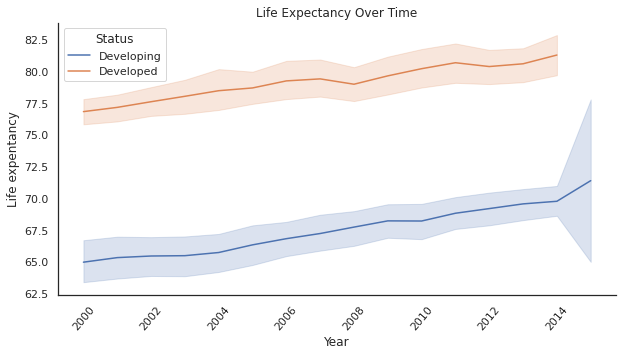

In [ ]:
#Life expectancy over the time
plt.figure(figsize= (10,5))
sns.lineplot(x=clean_df['Year'], y=clean_df['Life expectancy '], hue = 'Status', data = clean_df)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Life expentancy')
plt.title('Life Expectancy Over Time')
sns.despine()

We can see that the life expectancy for both developed and developing countries have been gradually increasing over the years. 

However, it seems like there's a big difference in life expectancy between developed and developing countries. 
Let's investigate it a little more.

In [ ]:
#Creating new DataFrame for each status of the country
developed_df = clean_df.loc[clean_df['Status'] == 'Developed']
developing_df = clean_df.loc[clean_df['Status'] == 'Developing']

In [ ]:
#Checking the average life expectancy for each

average_developed = developed_df['Life expectancy '].mean()
average_developing = developing_df['Life expectancy '].mean()

print(f'Average life expectancy for Developed countries: {round(average_developed, 1)} years old')
print(f'Average life expectancy for Developing countries: {round(average_developing, 1)} years old')

Average life expectancy for Developed countries: 79.2 years old
Average life expectancy for Developing countries: 67.3 years old


Now, we know that there is almost a 12 year difference in life expentancy between developed and developing countries. 

In order to accurately test the hypotheses, I'll analyze the data separately.   

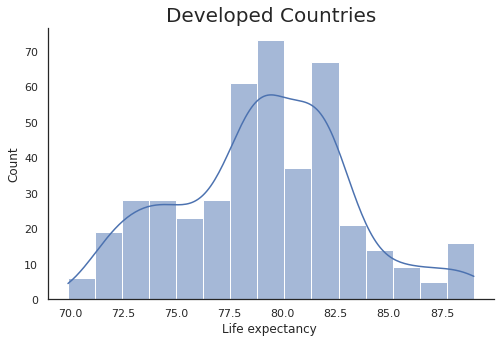

In [ ]:
#Checking Life expectancy distribution for developed countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developed_df['Life expectancy '], kde = True)
plt.title('Developed Countries', fontdict = {'fontsize' : 20} )
sns.despine()

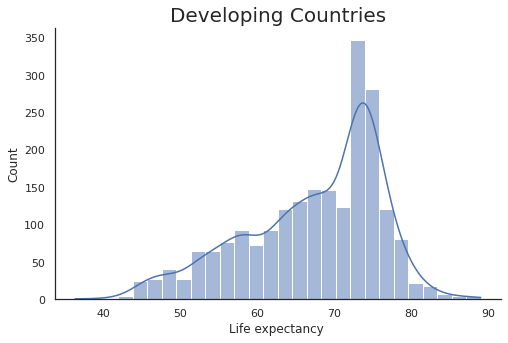

In [ ]:
#Checking Life expectancy distribution for developing countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developing_df['Life expectancy '], kde = True)
plt.title('Developing Countries', fontdict = {'fontsize' : 20} )
sns.despine()

Both have a bell curve, and we can see that they are normally distributed.

--- 

Before starting to see each research question more in depth, I'm going to divide the data into 2 categories using the average government total expenditure value by adding a new column to prepare for Question 2 analysis. 
- Question 2: Is there a difference in life expectancy depending on the amount spent on medical expenditure?

In [ ]:
#Adding a new column to divide the data into 2 categories 
#Developed countries
developed_df['medical_expense'] = np.where(developed_df['Total expenditure'] <= developed_df['Total expenditure'].mean(), 'Low', 'High')
print('---- Added a new column (Developed Countries Data) ----')
developed_df.head()

---- Added a new column (Developed Countries Data) ----


,Country,Year,Status,Life expectancy,Alcohol,Total expenditure,Schooling,medical_expense
113,Australia,2014,Developed,82.7,9.71,9.42,20.4,High
114,Australia,2013,Developed,82.5,9.87,9.36,20.3,High
115,Australia,2012,Developed,82.3,10.03,9.36,20.1,High
116,Australia,2011,Developed,82.0,10.30,9.20,19.8,High
117,Australia,2010,Developed,81.9,10.52,9.20,19.5,High


In [ ]:
#Developing countries
developing_df['medical_expense'] = np.where(developing_df['Total expenditure'] <= developing_df['Total expenditure'].mean(), 'Low', 'High')
print('---- Added a new column (Developing Countries Data) ----')
developing_df.head()

---- Added a new column (Developing Countries Data) ----


,Country,Year,Status,Life expectancy,Alcohol,Total expenditure,Schooling,medical_expense
0,Afghanistan,2015,Developing,65.0,0.01,8.16,10.1,High
1,Afghanistan,2014,Developing,59.9,0.01,8.18,10.0,High
2,Afghanistan,2013,Developing,59.9,0.01,8.13,9.9,High
3,Afghanistan,2012,Developing,59.5,0.01,8.52,9.8,High
4,Afghanistan,2011,Developing,59.2,0.01,7.87,9.5,High


In [ ]:
#Splitting the data for t-test
#Developed countries
low_spent = developed_df.loc[developed_df['medical_expense'] == 'Low']
high_spent = developed_df.loc[developed_df['medical_expense'] == 'High']

#Checking to see if the number of records are over 30 and good for t-test
developed_df['medical_expense'].value_counts()

High    266
Low     169
Name: medical_expense, dtype: int64

In [ ]:
#Developing countries
low_spent_dc = developing_df.loc[developing_df['medical_expense'] == 'Low']
high_spent_dc = developing_df.loc[developing_df['medical_expense'] == 'High']

#Checking to see if the number of records are over 30 and good for t-test
developing_df['medical_expense'].value_counts()

Low     1138
High    1005
Name: medical_expense, dtype: int64

Now we successfully split both developed and developing countries data to 2 categories to answer question 2 and also we now know that we have enough data to run the t-test.

Next, I'm going to check the distribution for each factor from research questions to understand more about the dataset and then everything should be set to run all the tests for analysis. 

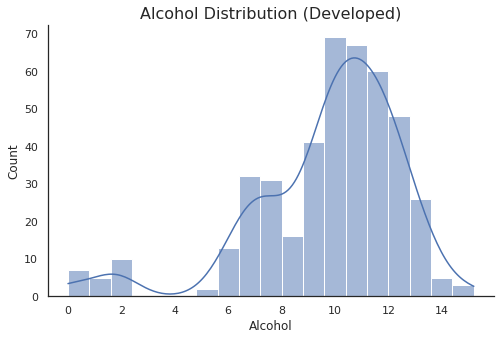

In [ ]:
#Checking Alcohol consumption distribution for developed countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developed_df['Alcohol'], kde = True)
plt.title('Alcohol Distribution (Developed)', fontdict = {'fontsize' : 16} )
sns.despine()

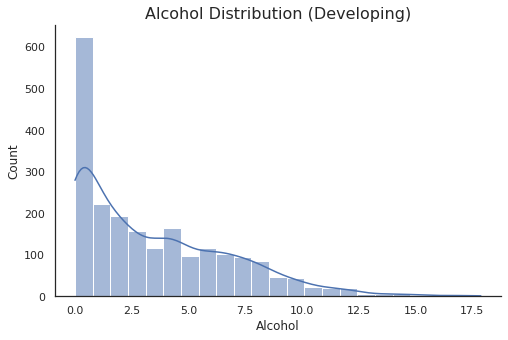

In [ ]:
#Checking Alcohol consumption distribution for developing countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developing_df['Alcohol'], kde = True)
plt.title('Alcohol Distribution (Developing)', fontdict = {'fontsize' : 16} )
sns.despine()

Alcohol distribution for developed countries has a bell curve and for developing countries it is right skewed. 

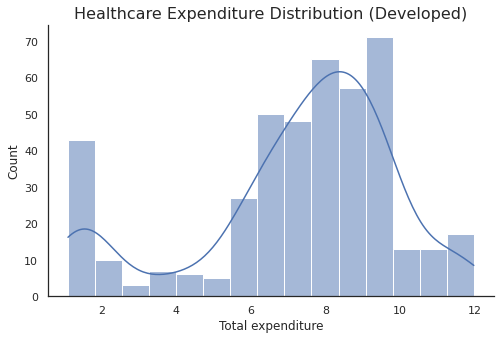

In [ ]:
#Checking total expenditure distribution for developed countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developed_df['Total expenditure'], kde = True)
plt.title('Healthcare Expenditure Distribution (Developed)', fontdict = {'fontsize' : 16} )
sns.despine()

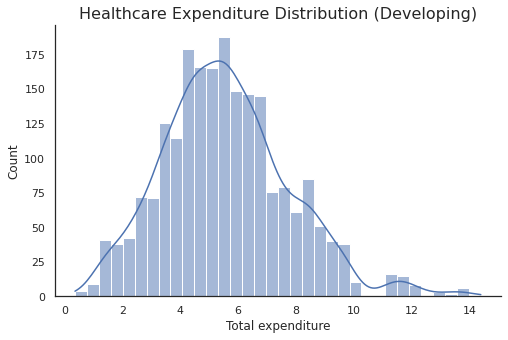

In [ ]:
#Checking total expenditure distribution for developing countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developing_df['Total expenditure'], kde = True)
plt.title('Healthcare Expenditure Distribution (Developing)', fontdict = {'fontsize' : 16} )
sns.despine()

They're both normally distributed.


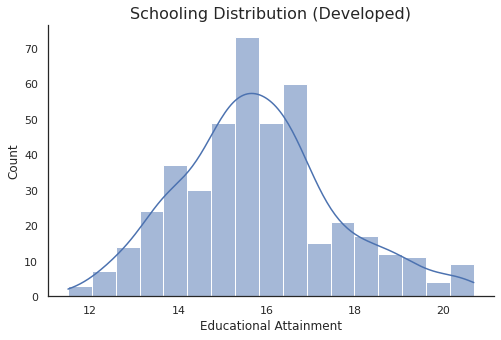

In [ ]:
#Checking schooling distribution for developed countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developed_df['Schooling'], kde = True)
plt.title('Schooling Distribution (Developed)', fontdict = {'fontsize' : 16} )
plt.xlabel('Educational Attainment')
sns.despine()

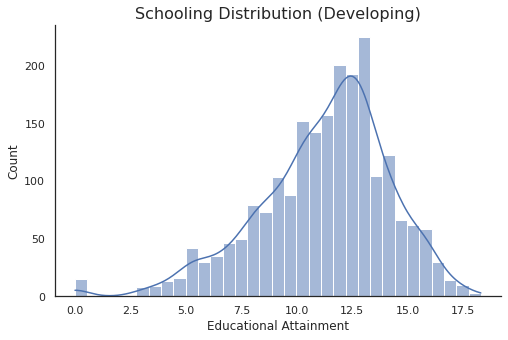

In [ ]:
#Checking schooling distribution for developing countries
plt.figure(figsize=(8, 5))
ax = sns.histplot(developing_df['Schooling'], kde = True)
plt.title('Schooling Distribution (Developing)', fontdict = {'fontsize' : 16} )
plt.xlabel('Educational Attainment')
sns.despine()

Both graphs have a normal distribution. 

##Data Analysis

Now the data is cleaned and we know all the factors are applicable for tests, It's time to test our hypotheses. 

####**Question 1:** Is there a relationship between drinking(alcohol consumption) and life expectancy?
> $H_0$: There is no (positive/negative) correlation between alcohol consumption and life expentancy

> $H_1$: There is either positive or negative correlation between alcohol consumption and life expentancy

First, let's use the scatter plot to visualize the potential correlation between alcohol consumption and life expectancy for both developed and developing ountries

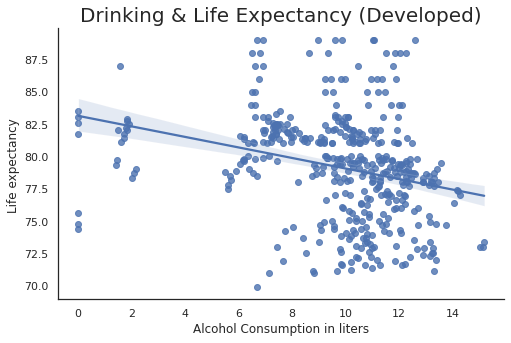

In [ ]:
# Displaying a scatter plot for developed countries
plt.figure(figsize=(8,5))
plt.title('Drinking & Life Expectancy (Developed)', fontdict = {'fontsize' : 20} )
sns.regplot(x='Alcohol', y='Life expectancy ', data= developed_df)
plt.xlabel('Alcohol Consumption in liters')
sns.despine()

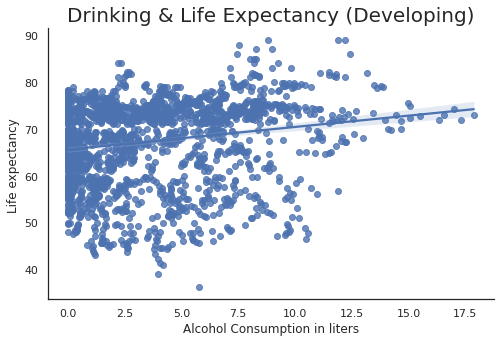

In [ ]:
# Displaying a scatter plot for developing countries
plt.figure(figsize=(8,5))
plt.title('Drinking & Life Expectancy (Developing)', fontdict = {'fontsize' : 20} )
sns.regplot(x='Alcohol', y='Life expectancy ', data= developing_df)
plt.xlabel('Alcohol Consumption in liters')
sns.despine()

Since the scatter plots do not show an obvious correlation between the life expectancy and the drinking, Pearson’s Correlation Coefficient test will be used to further examine the hypothesis.

In [ ]:
# run the person r test (Developed)
stats.pearsonr(developed_df['Alcohol'],developed_df['Life expectancy '])

(-0.2809691541422493, 2.4648468441999395e-09)

In [ ]:
# run the person r test (Developing)
stats.pearsonr(developing_df['Alcohol'],developing_df['Life expectancy '])

(0.18096757345037726, 3.110010632927006e-17)

####**Developed Countries**
We can see that the r value is -0.2809691541422493 which suggests a weak negative correlation. The p-value is 2.4648468441999395e-09 and less than 0.05. Therefore, we can **reject** the null hypothesis. This means that in developed countries, people who drink more are more likely to have shorter life span than those who don't drink or drink less. 

####**Developing Countries**
We can see that the r value is 0.18096757345037726 suggests a weak positive correlation. The p-value is 3.110010632927006e-17 and less than 0.05. Therefore, we can **reject** the null hypothesis. This means that in developing countries, people who drink more are more likely to have longer life span than those who don't drink or drink less. 


####**Summary**
We can conclude that there **is** a statistically significant linear relationship between drinking and life expectancy for both developed and developing countries. 

*This analysis does not prove or disprove that the drinking is the causation of longer/shorter life span. 


####**Question 2:** Is there a difference in life expectancy depending on the amount spent on medical expenditure?
> $H_0$: There is no significant difference between life expectancy for countries that spend more on medical expenditure and countries that spend less

> $H_1$: There is a significant difference between life expectancy for countries that spend more on medical expenditure and countries that spend less

First, let's display the boxplot to check how the life expectancy is distributed across the two categories.

Text(0.5, 0, 'Medical Expense')

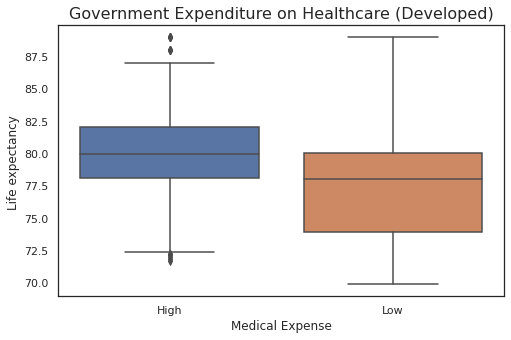

In [ ]:
#Displaying the box plot (Developed)
plt.figure(figsize=(8,5))
plt.title('Government Expenditure on Healthcare (Developed)', fontdict = {'fontsize' : 16} )
sns.boxplot(y = developed_df['Life expectancy '], x = developed_df['medical_expense'])
plt.xlabel('Medical Expense')

Text(0.5, 0, 'Medical Expense')

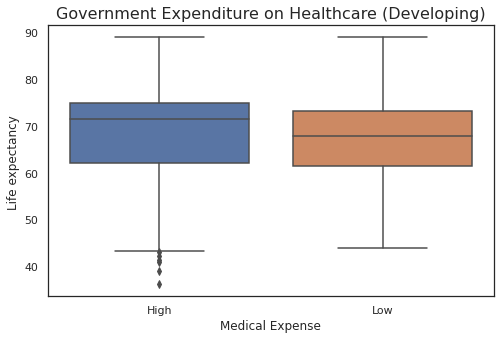

In [ ]:
#Displaying the box plot (Developing)
plt.figure(figsize=(8,5))
plt.title('Government Expenditure on Healthcare (Developing)', fontdict = {'fontsize' : 16} )
sns.boxplot(y = developing_df['Life expectancy '], x = developing_df['medical_expense'])
plt.xlabel('Medical Expense')

In [ ]:
# run the t-test (Developed)
stats.ttest_ind(low_spent['Life expectancy '], high_spent['Life expectancy '])

Ttest_indResult(statistic=-6.488063423897843, pvalue=2.380461306321953e-10)

In [ ]:
# run the t-test (Developing)
stats.ttest_ind(low_spent_dc['Life expectancy '], high_spent_dc['Life expectancy '])

Ttest_indResult(statistic=-4.374260774326177, pvalue=1.2769076470947397e-05)

####**Developed Countries**
The test result shows a p-value of 2.380461306321953e-10 which is  less than 0.05. Therefore, we can **reject** the null hypothesis. T-test shows that life expectancy in the develped countries that spend more on healthcare are 6.5 years longer than the developed countries that spend less on healthcare.


####**Developing Countries**
The test result shows a p-value of 1.2769076470947397e-05 which is  less than 0.05. Therefore, we can **reject** the null hypothesis. T-test shows that life expectancy in the develping countries that spend more on healthcare are 4.4 years longer than the developing countries that spend less on healthcare.

####**Summary**
T-test tells us that with a 95% confidence there **is** a statistically significant difference between life expectancy for countries that spent more than the average on healthcare and for countries that spent less than the average on healthcare.

For both developed and developing countries, we can say that countries that allocate more money for healthcare are more likely to have longer life span than the countries that spend less. 

####**Question 3:** Is there a relationship between life expectancy and schooling?
> $H_0$: There is no (positive/negative) correlation between life expectancy for countries that have more years in schooling and countries that have less years in schooling

> $H_1$: There is either positive or negative correlation between life expectancy and educational attainment


First, let's use the scatter plot to visualize the potential correlation between life expectancy and educational attainment. 



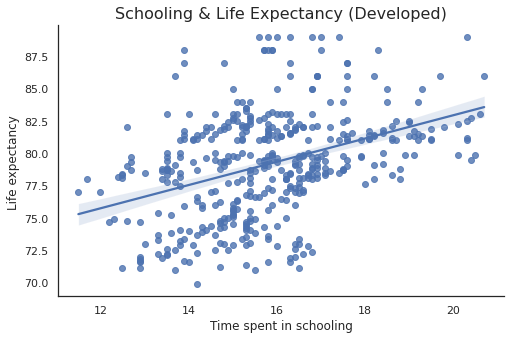

In [ ]:
# Displaying a scatter plot (Developed)
plt.figure(figsize=(8,5))
plt.title('Schooling & Life Expectancy (Developed)', fontdict = {'fontsize' : 16} )
sns.regplot(x='Schooling', y='Life expectancy ', data= developed_df)
plt.xlabel('Time spent in schooling')
sns.despine()

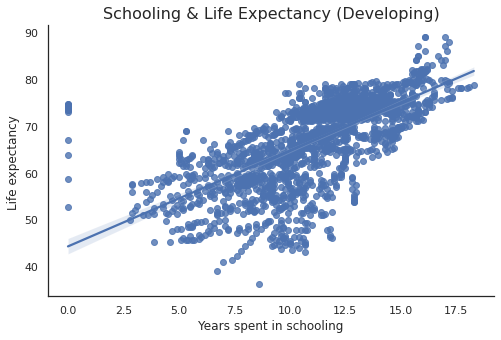

In [ ]:
# Displaying a scatter plot (Developing)
plt.figure(figsize=(8,5))
plt.title('Schooling & Life Expectancy (Developing)', fontdict = {'fontsize' : 16} )
sns.regplot(x='Schooling', y='Life expectancy ', data= developing_df)
plt.xlabel('Years spent in schooling')
sns.despine()

We can see both scatter plots are showing a positive correlation between the life expectancy and the schooling, but let's run Pearson’s Correlation Coefficient test to further examine the hypothesis.

In [ ]:
# run the person r test (Developed)
stats.pearsonr(developed_df['Schooling'],developed_df['Life expectancy '])

(0.3921322253345009, 1.93277539922764e-17)

In [ ]:
# run the person r test (Developing)
stats.pearsonr(developing_df['Schooling'],developing_df['Life expectancy '])

(0.680275493759189, 3.43643009621654e-291)

####**Developed Countries**
We can see that the r value is 0.3921322253345009 which suggests a positive correlation. The p-value is 1.93277539922764e-17 and less than 0.05. Therefore, we can **reject** the null hypothesis. This means that countries that have higher educational attainment are more likely to have longer life expectancy.

####**Developing Countries**
We can see that the r value is 0.6805012897748841 which suggests a strong positive correlation. The p-value is 3.43643009621654e-291 and less than 0.05. Therefore, we can **reject** the null hypothesis. This means that countries that have higher educational attainment are more likely to have longer life expectancy.

####**Summary**
We can conclude that there **is** a statistically significant linear relationship between life expectancy and educational attainment.
We can say that people with higher educational attainment are more likely to have longer life span. 


##Conclusion

Looking at the analysis conducted on life expenctancy, we can make the following conclusions:
- There is a relationship between life expectancy and:
> - drinking (Alcohol consumption)
> - years spent in schools (educational attainment)
- There is a statistically significant difference between life expectancy depending on how much governments spend on healthcare.

I conducted analysis separetely on developed countries and developing countries this time, but we can see that most of the factors affect life expectancy in the same manner.  

###Recommendations
- There is a relationship between life expectancy and drinking, however this research doesn't prove or disprove that the drinking is the causation of the long life span. Therefore, we can further research to see other factors that may affect th relationship between drinking and life expectancy such as income level, money spent on alcohol and so on. 
- This dataset includes more data like immunization factors and mortality rates and this analysis did not cover these aspects. In the future, we can do more analysis focusing on those factors. Understanding factors that contributing to life expectancy will definitely help us to extend the future life expectancy. 
- The health organizations and governments especially for those that are struggling with short life expectancy may find this research useful. Policy-makers can also utilize this research and analysis in order to provide viable and attractive options for their nations because improvements in life expectancy means an increase in the proportion of older individuals living in society. 

As we saw earlier, the average life span has been increasing over time  and considering the rate at which human lifespan has increased over the years, it can surely be extended further.


This is the end of my analysis. Thank you for reading! 